
# K-Nearest Neighbors



## Objectives

*   Use K Nearest neighbors to classify data


Let's load required libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

### About the dataset
Dataset from Davide Chicco, Giuseppe Jurman: â€œMachine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

Import the dataset
1
This dataset was hosted on Kaggle. Click <a href="https://www.kaggle.com/datasets/sagar029/heart-failure?select=heart_failure.csv">HERE</a>.

In [2]:
df = pd.read_csv("C:/Users/17018/OneDrive - Nigerian National Petroleum Corporation/Desktop/IBM Data Science/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
df.shape

(299, 13)

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Cleaning The Data

In [7]:
# Missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
# Check for dupicate
df.duplicated().sum()

0

#### Inspecting our columns

In [15]:
Cols = df.columns.drop("DEATH_EVENT")
Cols

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

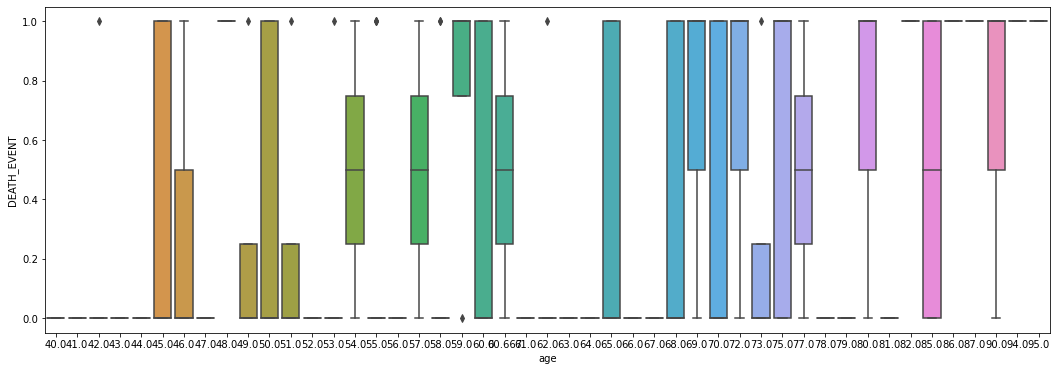

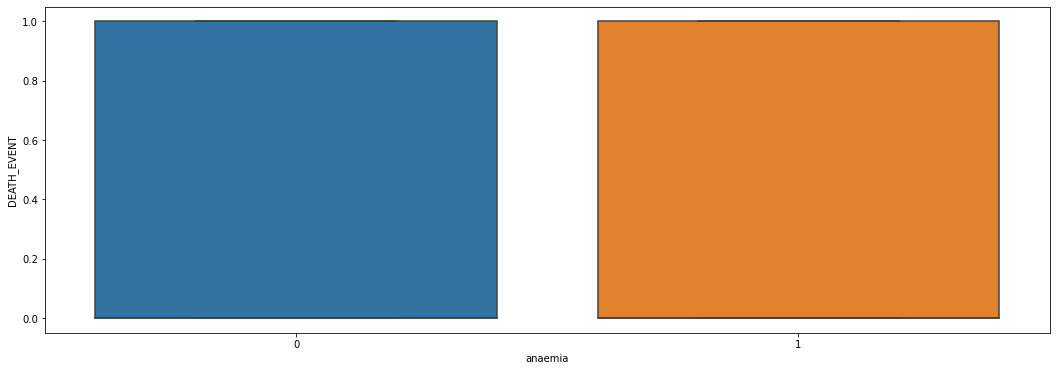

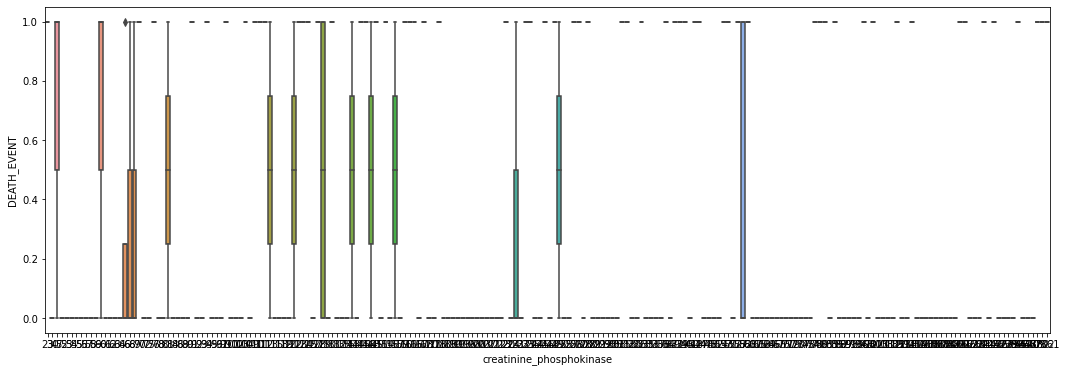

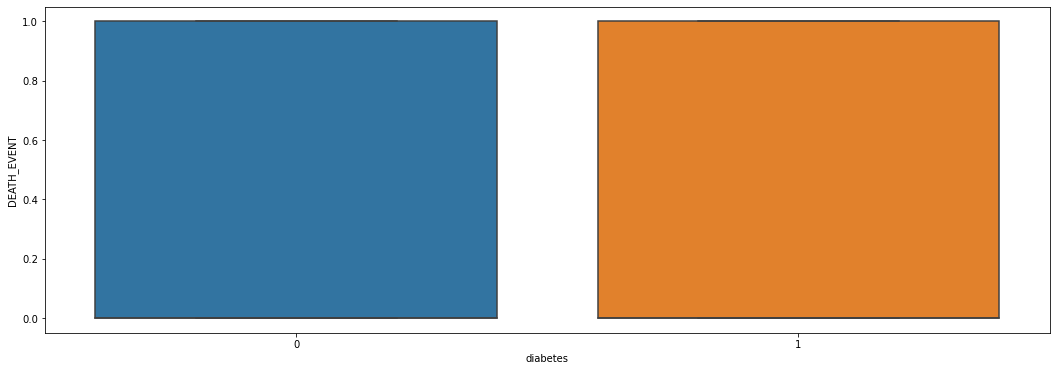

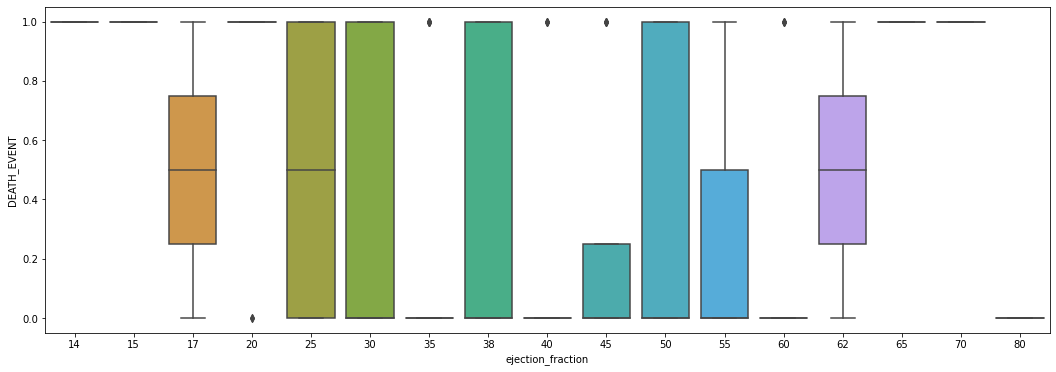

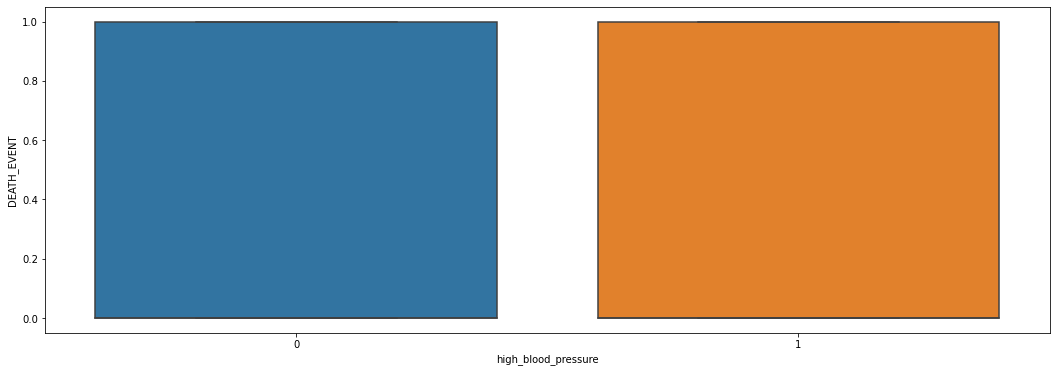

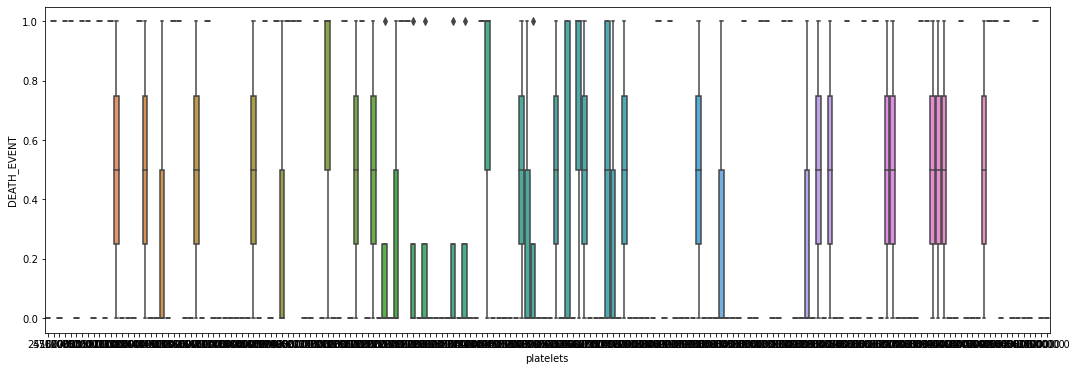

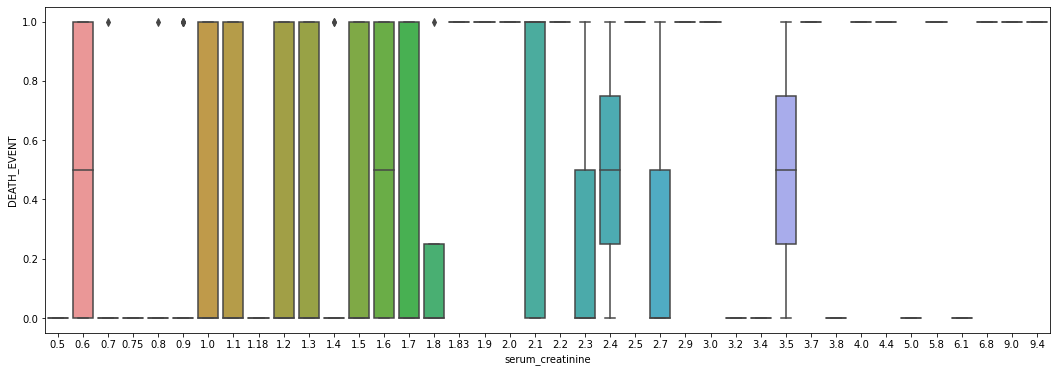

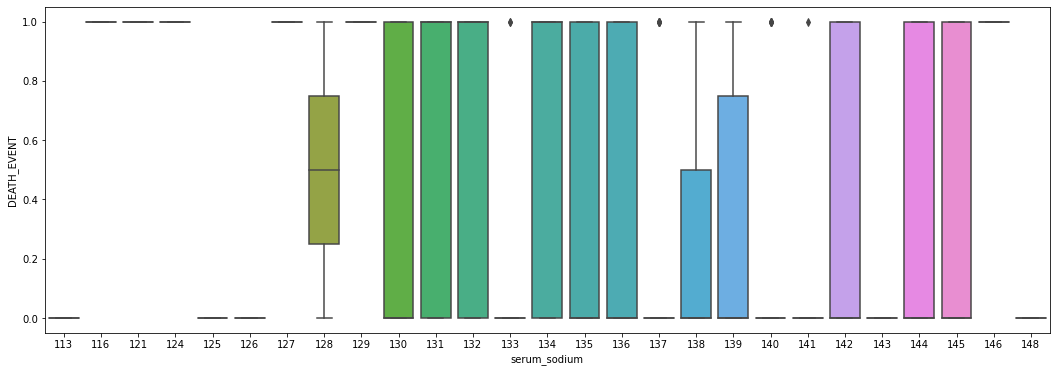

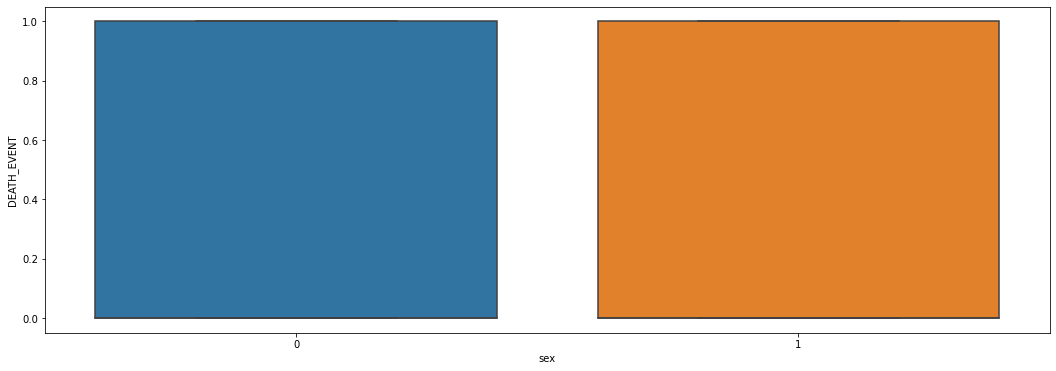

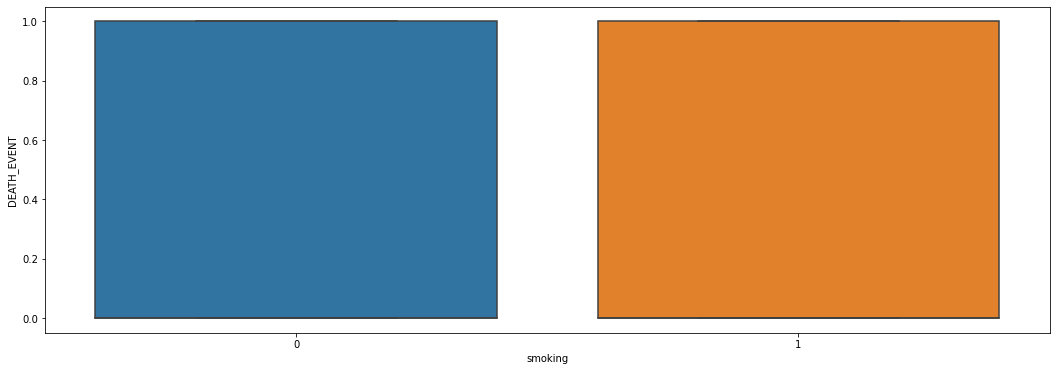

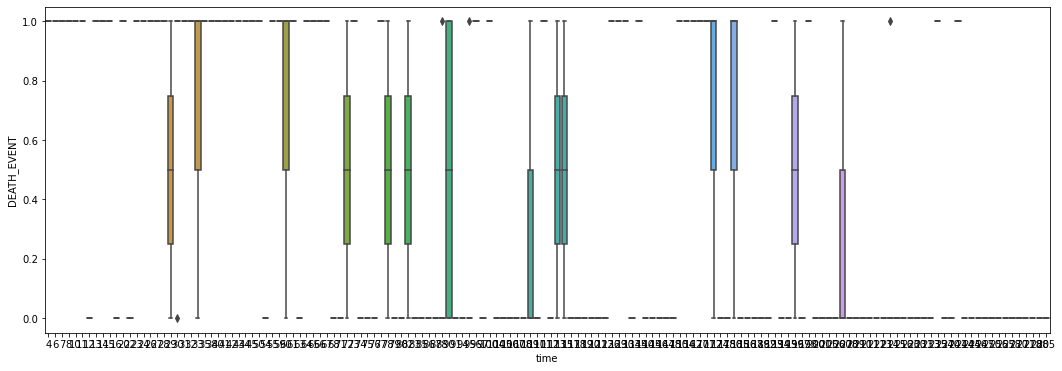

In [16]:
for col in Cols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, y="DEATH_EVENT", data=df)
    plt.show()

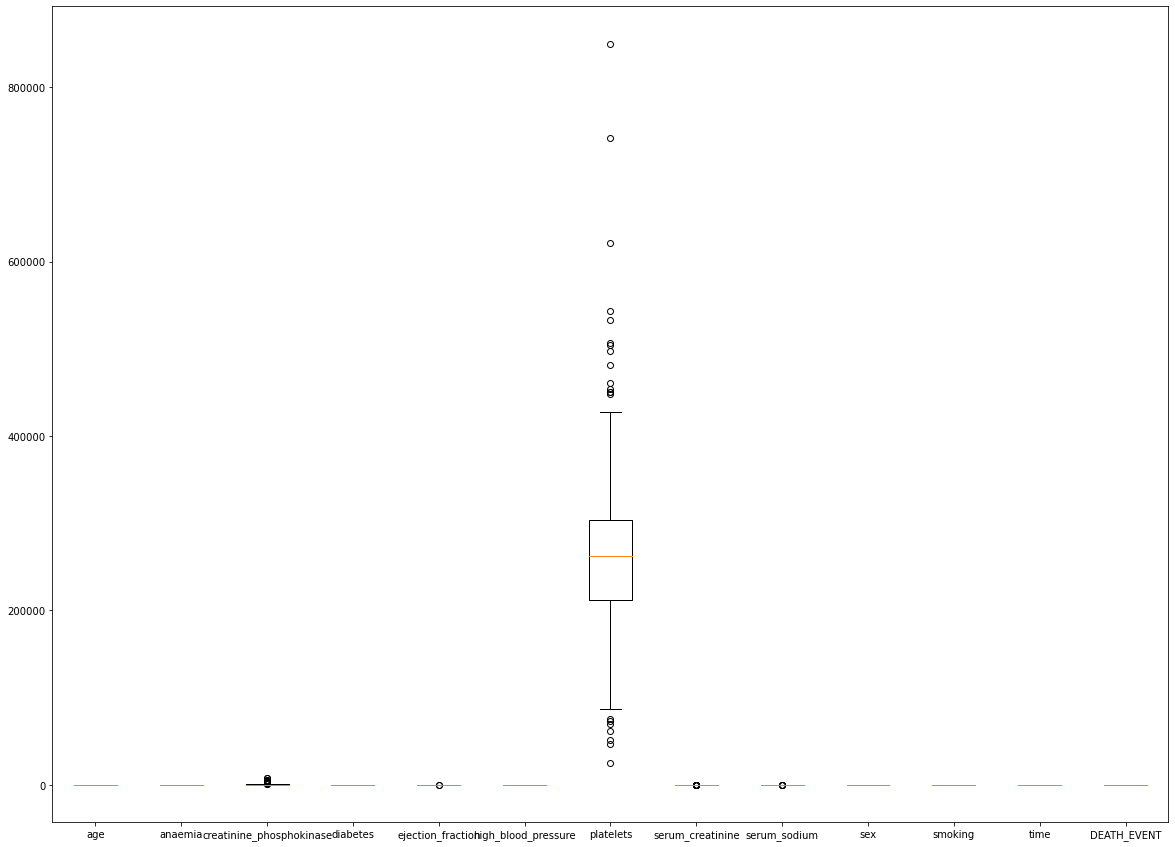

In [10]:
# Outliers values
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()


### Creatinine phosphokinase column

In [19]:
df['creatinine_phosphokinase'].describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers values')

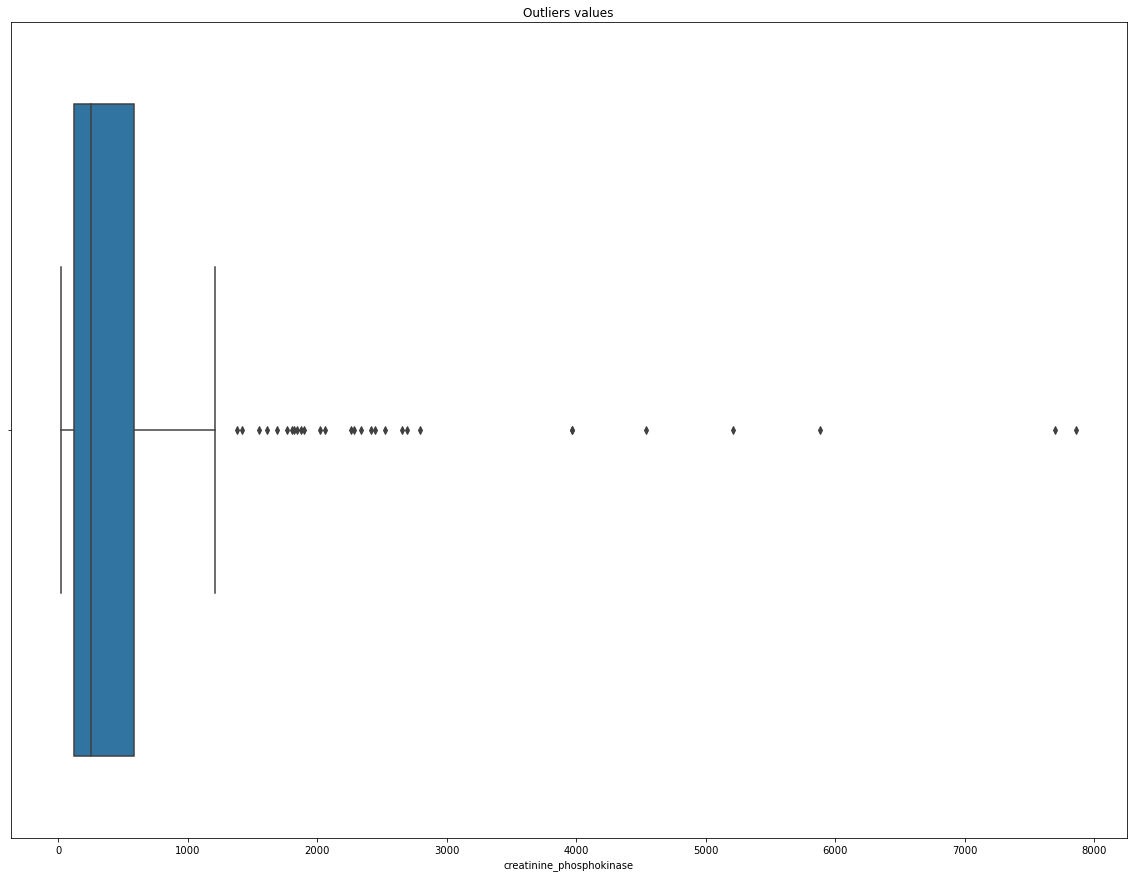

In [23]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Outliers values')

In [24]:
# Removing outliers
q1 = df['creatinine_phosphokinase'].quantile(0.25)
q3 = df['creatinine_phosphokinase'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'creatinine_phosphokinase'] > toprange:
        df.loc[i, 'creatinine_phosphokinase'] = toprange
    if df.loc[i, 'creatinine_phosphokinase'] < botrange:
        df.loc[i, 'creatinine_phosphokinase'] = botrange

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cleaning values')

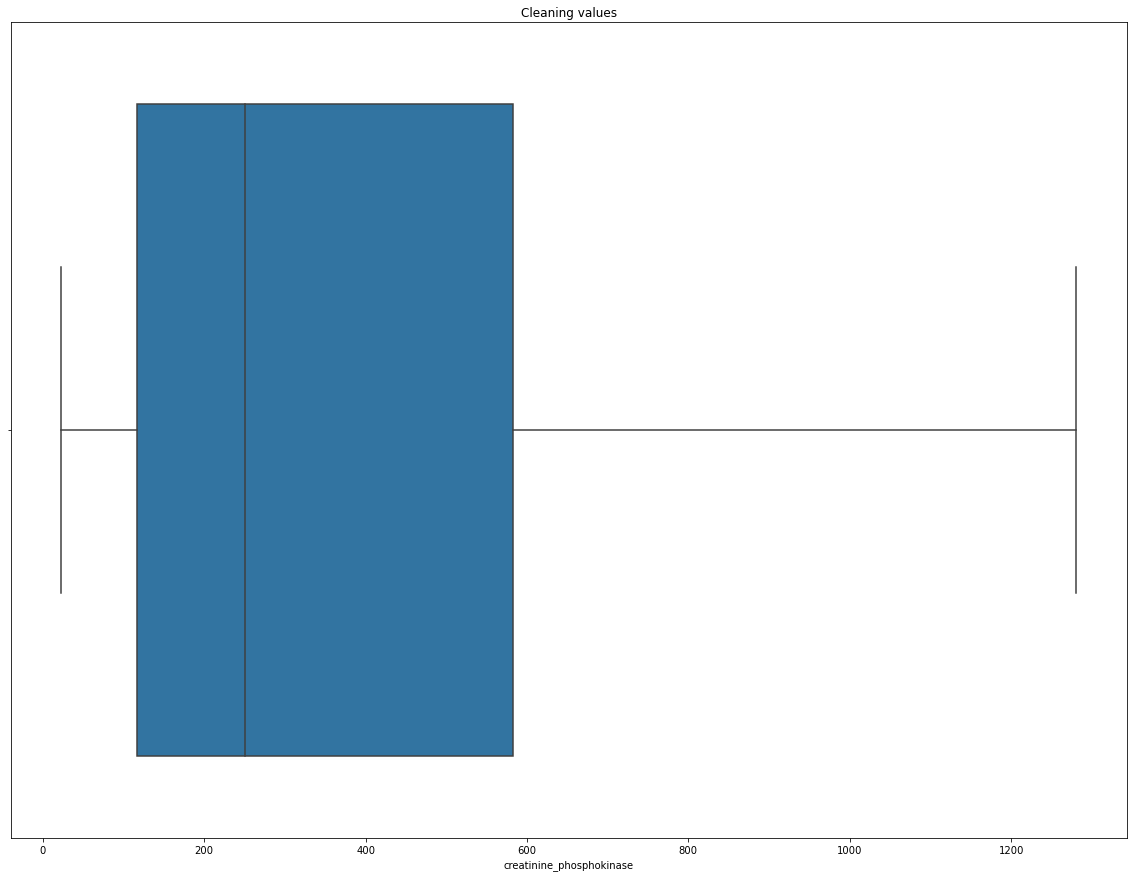

In [29]:
# Creatinine phosphokinase column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Cleaning values')

In [27]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers values')

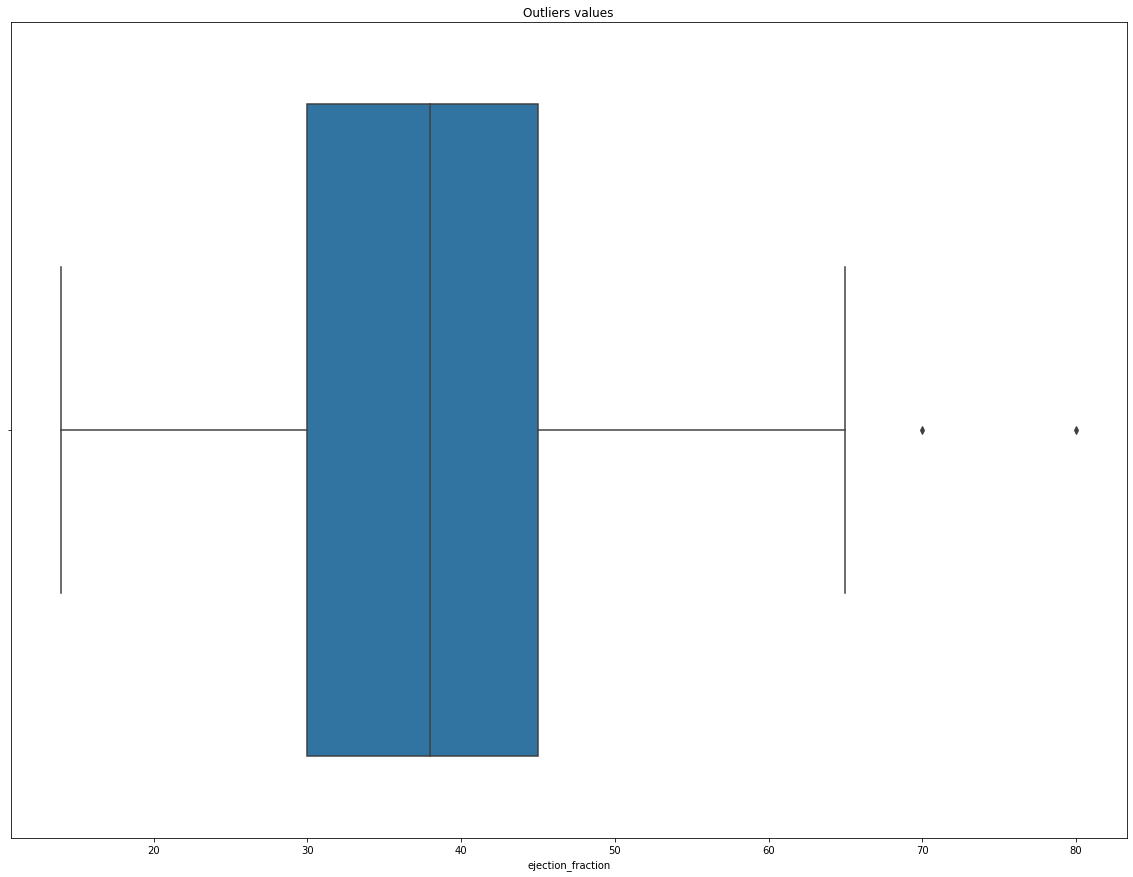

In [28]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Outliers values')

In [30]:
# Removing outliers
q1 = df['ejection_fraction'].quantile(0.25)
q3 = df['ejection_fraction'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'ejection_fraction'] > toprange:
        df.loc[i, 'ejection_fraction'] = toprange
    if df.loc[i, 'ejection_fraction'] < botrange:
        df.loc[i, 'ejection_fraction'] = botrange

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cleaning values')

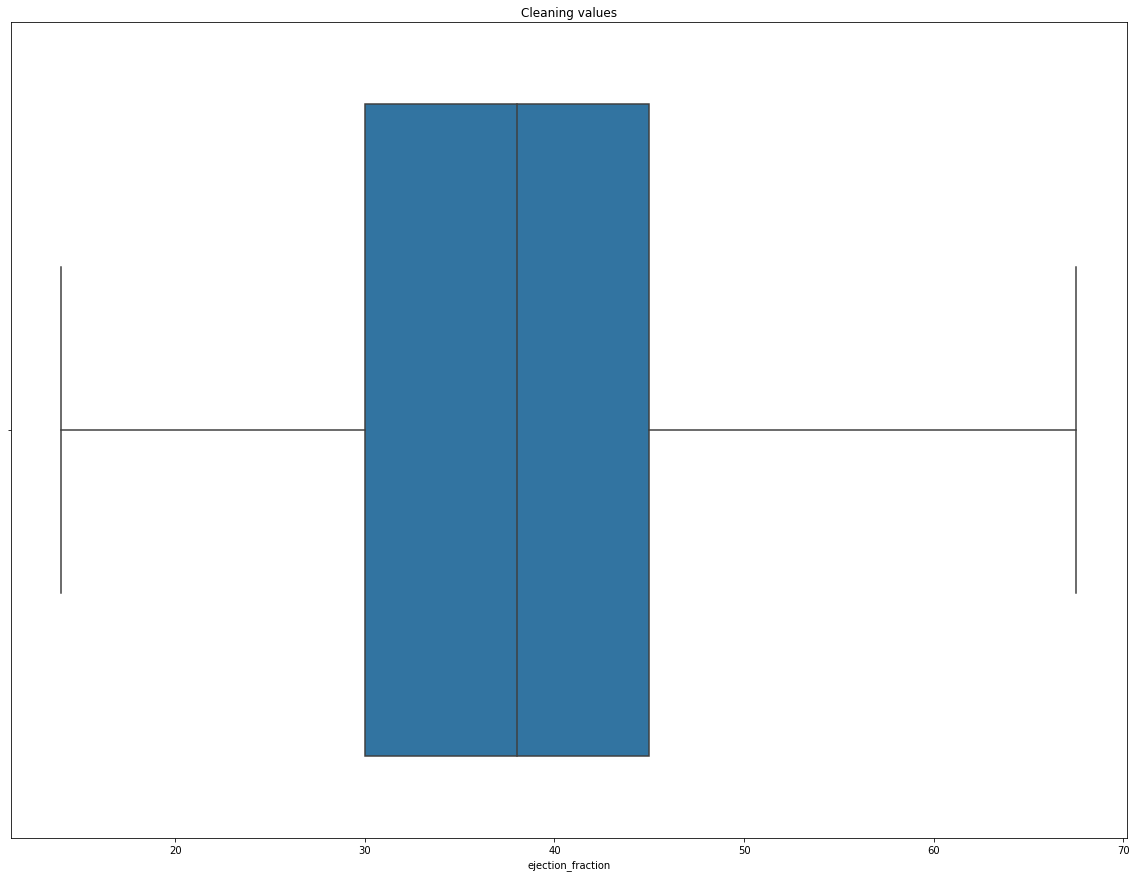

In [31]:
# Ejection fraction column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Cleaning values')

In [32]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers values')

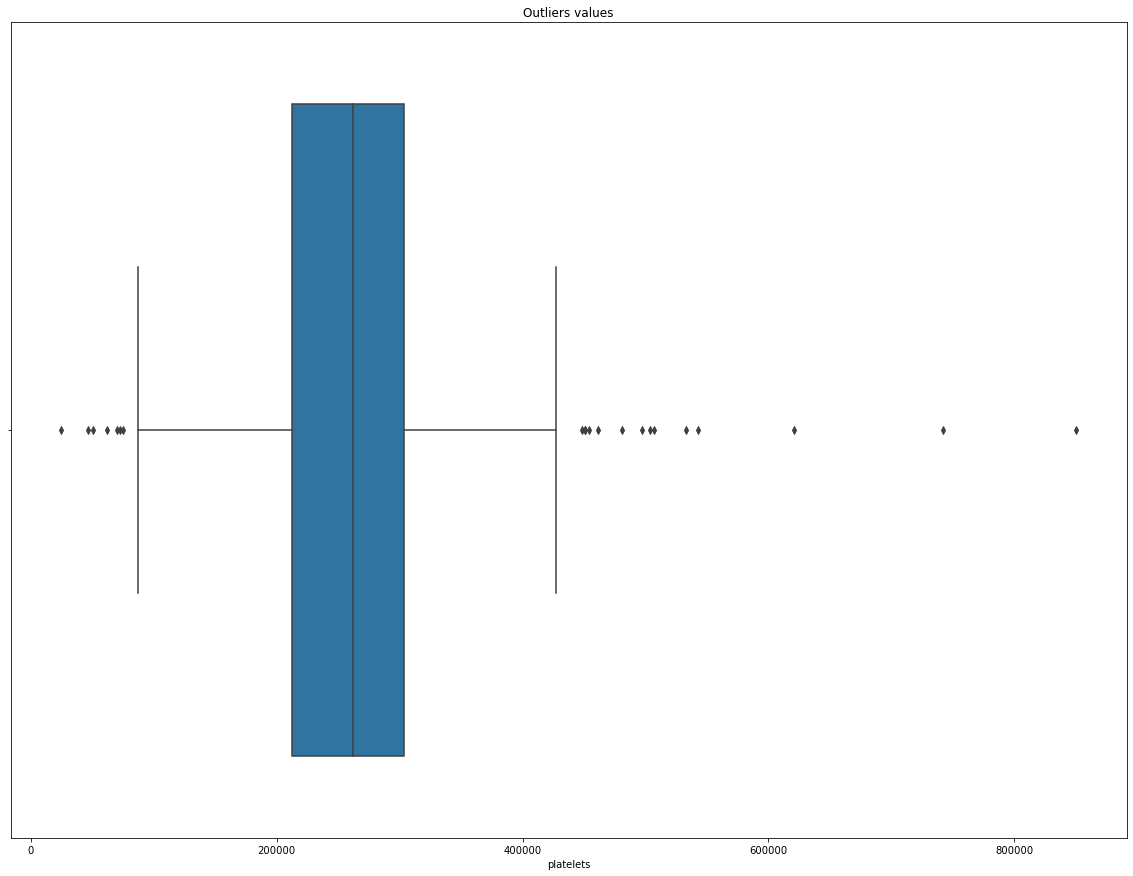

In [33]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['platelets'], labels=['platelets'])
plt.title('Outliers values')

In [34]:
# Removing outliers
q1 = df.platelets.quantile(0.25)
q3 = df.platelets.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'platelets'] > toprange:
        df.loc[i, 'platelets'] = toprange
    if df.loc[i, 'platelets'] < botrange:
        df.loc[i, 'platelets'] = botrange

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cleaning values')

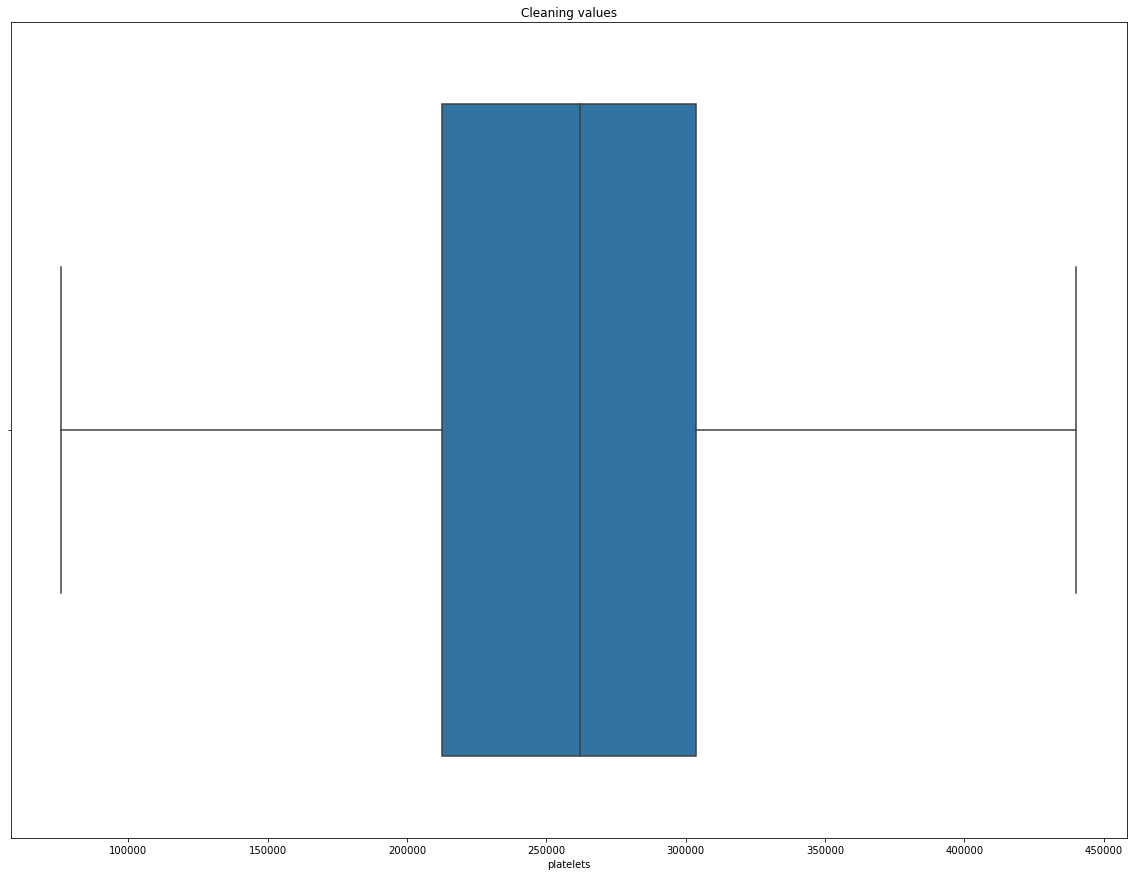

In [35]:
# Platelets column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['platelets'], labels=['Platelets'])
plt.title('Cleaning values')

In [36]:
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Text(0.5, 1.0, 'Outliers values')

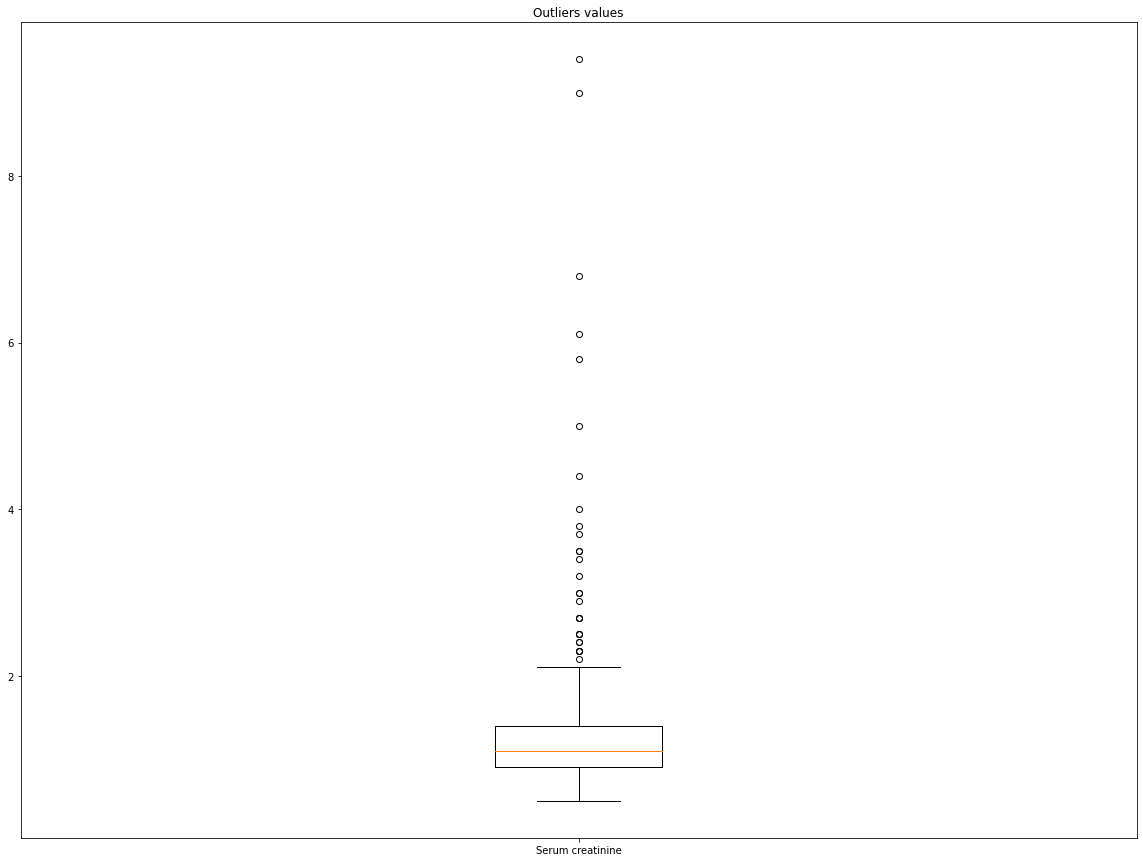

In [37]:
plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Outliers values')

In [38]:
# Removing outliers
q1 = df.serum_creatinine.quantile(0.25)
q3 = df.serum_creatinine.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'serum_creatinine'] > toprange:
        df.loc[i, 'serum_creatinine'] = toprange
    if df.loc[i, 'serum_creatinine'] < botrange:
        df.loc[i, 'serum_creatinine'] = botrange

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cleaning values')

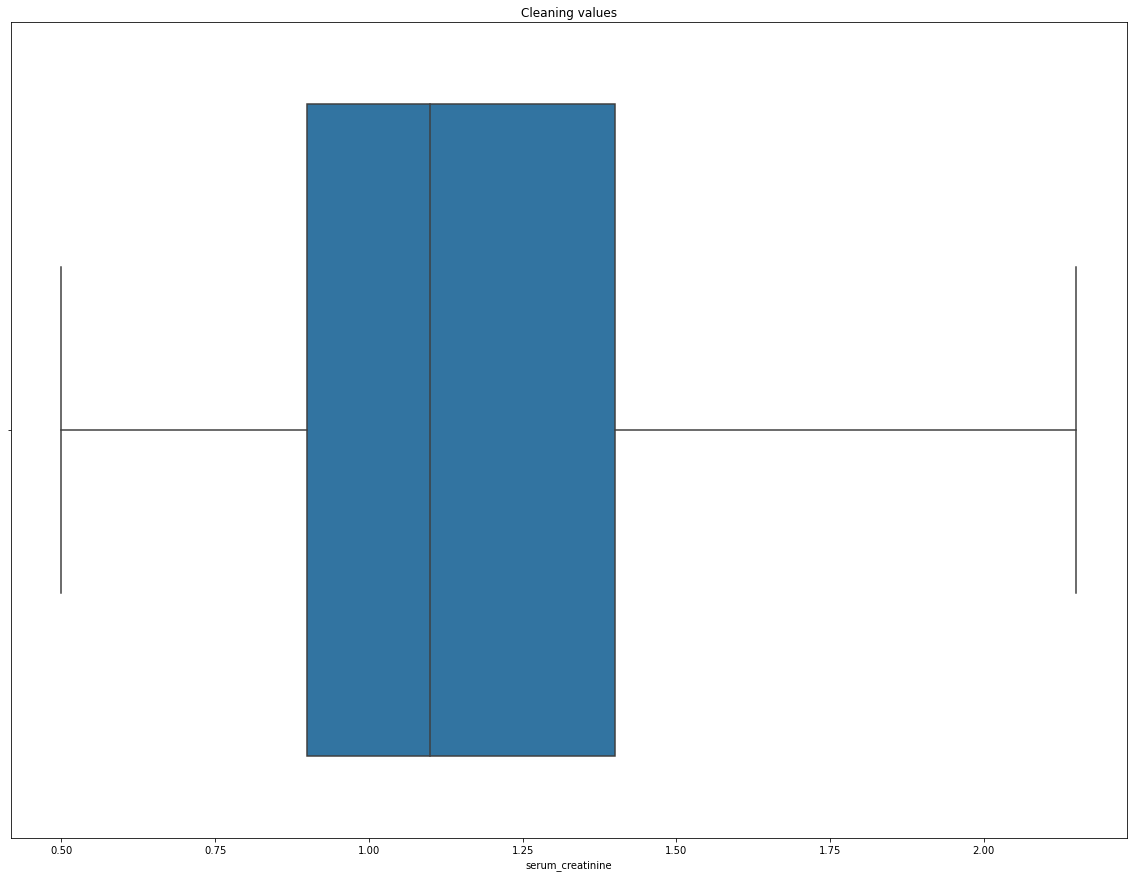

In [39]:
# Platelets column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Cleaning values')

In [40]:
df.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers values')

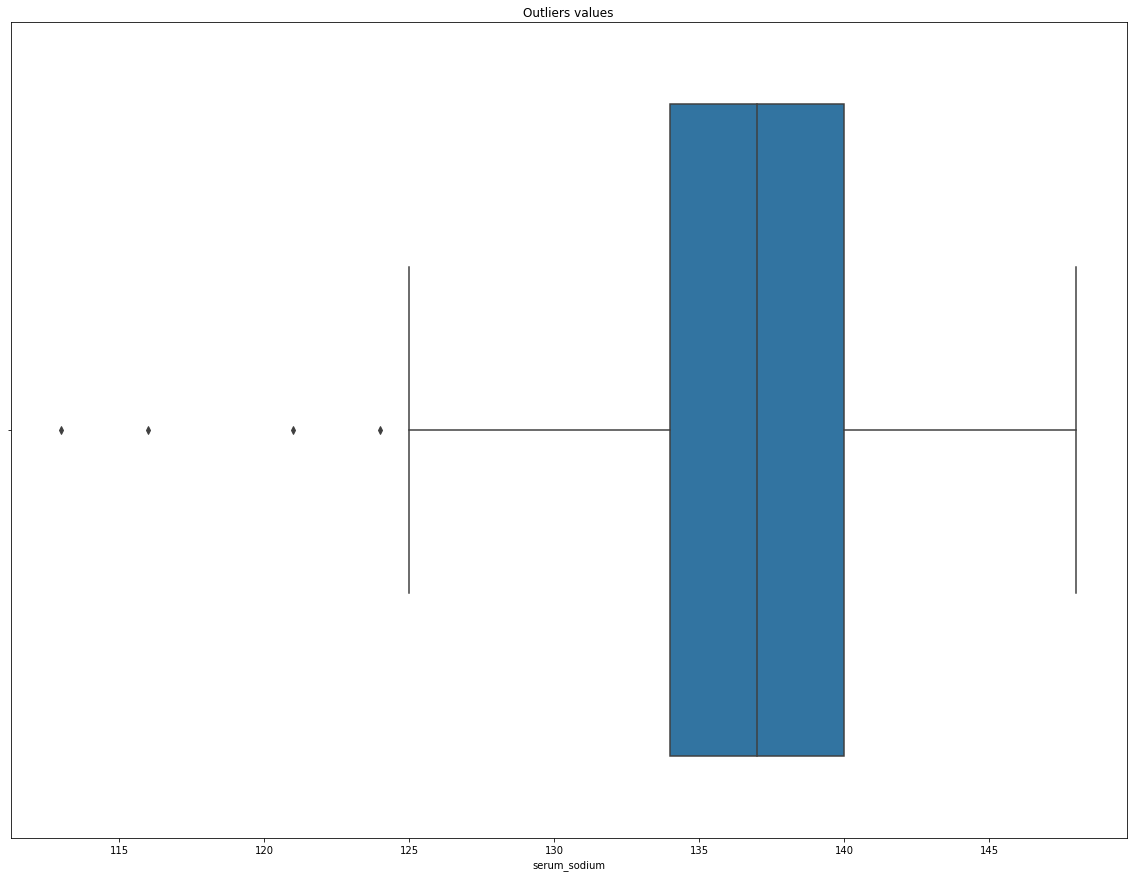

In [41]:
plt.figure(figsize=(20, 15))
sns.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Outliers values')

In [42]:
# Removing outliers
q1 = df.serum_sodium.quantile(0.25)
q3 = df.serum_sodium.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'serum_sodium'] > toprange:
        df.loc[i, 'serum_sodium'] = toprange
    if df.loc[i, 'serum_sodium'] < botrange:
        df.loc[i, 'serum_sodium'] = botrange

C:\Users\17018\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cleaning values')

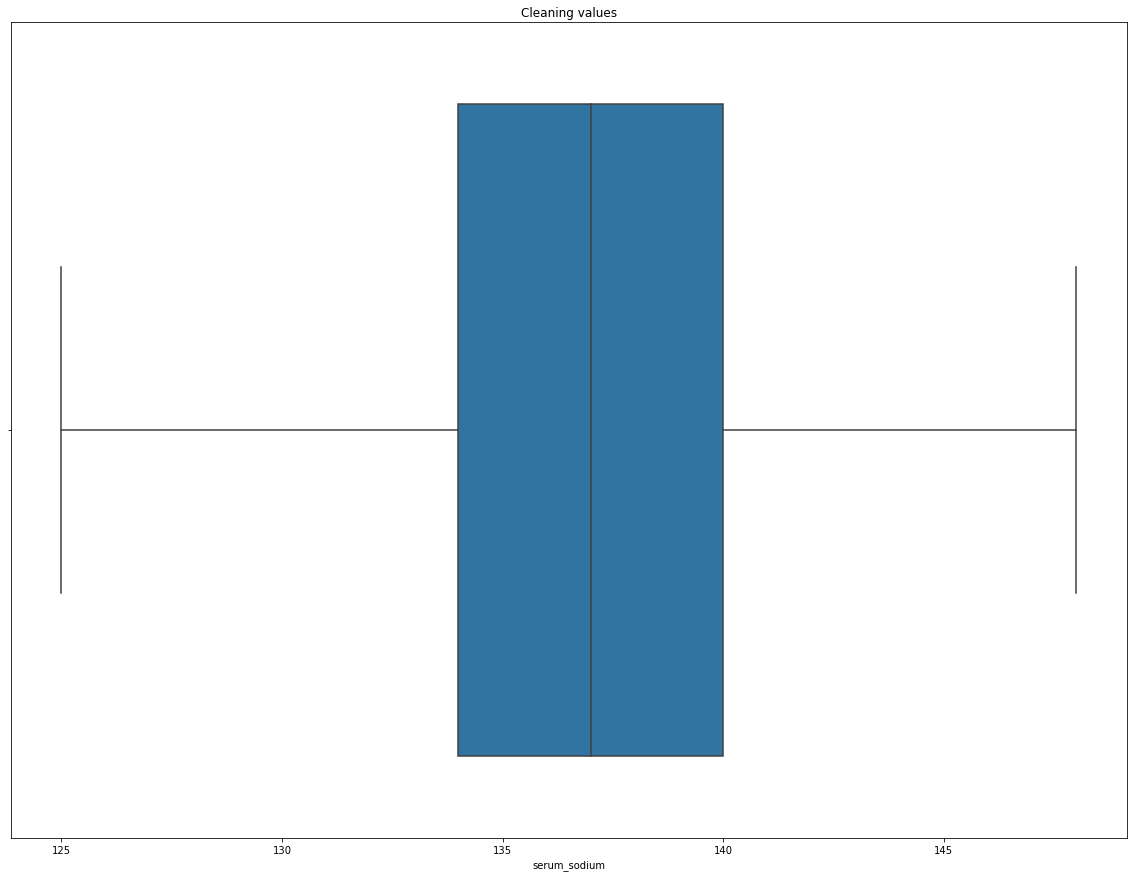

In [43]:
# Serum sodium column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Cleaning values')

### Dropping the time column

In [44]:
df.drop('time', axis=1, inplace=True)

## Exploring the data


In [45]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,1
5,90.0,1,47.00,0,40.0,1,204000.00,2.10,132,1,1,1
6,75.0,1,246.00,0,15.0,0,127000.00,1.20,137,1,0,1
7,60.0,1,315.00,1,60.0,0,440000.00,1.10,131,1,1,1
8,65.0,0,157.00,0,65.0,0,263358.03,1.50,138,0,0,1
9,80.0,1,123.00,0,35.0,1,388000.00,2.15,133,1,1,1


### Feature set
Let's define feature sets, X:

In [48]:
X = df[['age', 'anaemia','creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine','serum_sodium', 'sex', 'smoking']].values  #.astype(float)
X[0:5]


array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
        1.3000000e+02, 1.0000000e+00, 0.0000000e+00],
       [5.5000000e+01, 0.0000000e+00, 1.2802500e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 1.0000000e+00, 0.0000000e+00],
       [6.5000000e+01, 0.0000000e+00, 1.4600000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 1.6200000e+05, 1.3000000e+00,
        1.2900000e+02, 1.0000000e+00, 1.0000000e+00],
       [5.0000000e+01, 1.0000000e+00, 1.1100000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 2.1000000e+05, 1.9000000e+00,
        1.3700000e+02, 1.0000000e+00, 0.0000000e+00],
       [6.5000000e+01, 1.0000000e+00, 1.6000000e+02, 1.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 3.2700000e+05, 2.1500000e+00,
        1.2500000e+02, 0.0000000e+00, 0.0000000e+00]])

What are our labels?

In [49]:
y = df['DEATH_EVENT'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [50]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.19294523e+00, -8.71104775e-01,  4.10039982e-01,
        -8.47579380e-01, -1.54580089e+00,  1.35927151e+00,
         7.17500123e-02,  1.51466529e+00, -1.64917230e+00,
         7.35688190e-01, -6.87681906e-01],
       [-4.91279276e-01, -8.71104775e-01,  2.22459906e+00,
        -8.47579380e-01, -2.86684140e-03, -7.35688190e-01,
         5.15639924e-02, -3.06160609e-01, -1.75024265e-01,
         7.35688190e-01, -6.87681906e-01],
       [ 3.50832977e-01, -8.71104775e-01, -7.23003713e-01,
        -8.47579380e-01, -1.54580089e+00, -7.35688190e-01,
        -1.19450945e+00,  1.49045866e-01, -1.89486364e+00,
         7.35688190e-01,  1.45416070e+00],
       [-9.12335403e-01,  1.14796753e+00, -8.13959056e-01,
        -8.47579380e-01, -1.54580089e+00, -7.35688190e-01,
        -6.04407954e-01,  1.51466529e+00,  7.06670740e-02,
         7.35688190e-01, -6.87681906e-01],
       [ 3.50832977e-01,  1.14796753e+00, -6.86621576e-01,
         1.17983050e+00, -1.54580089e+00, -7.35688190e-01,
  

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 11) (239,)
Test set: (60, 11) (60,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


### Training

Let's start the algorithm with k=4 for now:

In [54]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [55]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [59]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7824267782426778
Test set Accuracy:  0.7333333333333333


## Practice

Can you build the model again, but this time with k=6?


In [68]:
# write your code here
k = 6
#Train Model and Predict  
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.7531380753138075
Test set Accuracy:  0.75


In [61]:
k = 9
#Train Model and Predict  
neigh9 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat9 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh9.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat9))

Train set Accuracy:  0.7405857740585774
Test set Accuracy:  0.7333333333333333


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [65]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66666667, 0.71666667, 0.7       , 0.73333333, 0.73333333,
       0.76666667, 0.73333333, 0.75      , 0.75      ])

#### Plot the model accuracy for a different number of neighbors.

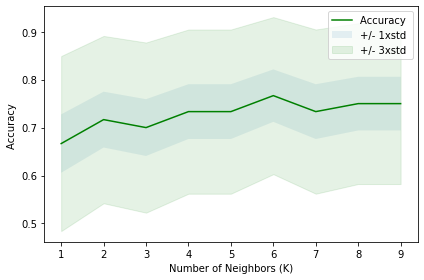

In [66]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [69]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7666666666666667 with k= 6
